## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [1]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)].reset_index()

In [4]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

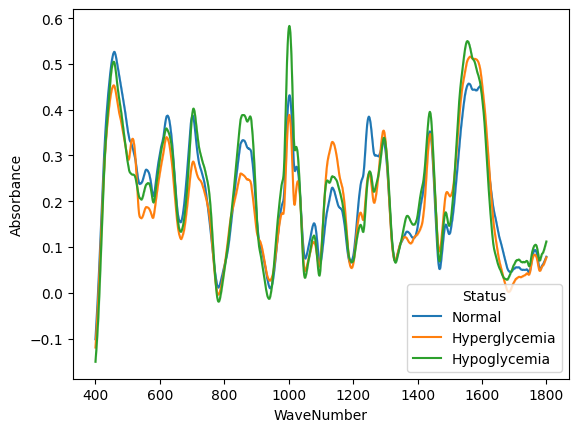

In [5]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [6]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SpecID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], prominence=0.06, width=4)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [7]:
weights['widths']

array([134.11888914,  24.20060399,  17.54200636,  23.10380665,
        33.98318381,  83.73538968, 104.04847287,  18.92683095,
        15.01710207,  49.21993166,  13.60184931,   9.53477332,
        62.7423805 ,   7.09570733,  21.85112743, 152.45588517,
        17.02055569,  30.42055589, 133.14114612,  23.89262959,
        80.49165976,  34.06397874])

In [8]:
print(len(peaks))

49792


Below shows a scatterplot of the coordinates of all the peaks we have found

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

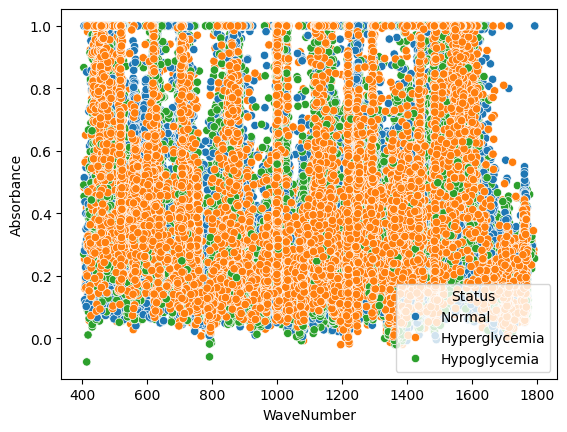

In [9]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [10]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

C:\Users\stang\AppData\Local\Temp\ipykernel_20512\2901317241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Widths'] = widths
C:\Users\stang\AppData\Local\Temp\ipykernel_20512\2901317241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['Prominences'] = prom


In [11]:
peak_df

,index,SpecID,Seq,WaveNumber,SurID,Status,Absorbance,Widths,Prominences
96,389,201210-1-00,389,465.83142,201210-1,Normal,0.353587,72.606738,0.304971
317,610,201210-1-00,610,616.85651,201210-1,Normal,0.842037,55.638128,0.824644
433,726,201210-1-00,726,696.12756,201210-1,Normal,1.000000,44.976049,1.007654
605,898,201210-1-00,898,813.66742,201210-1,Normal,0.080192,18.899708,0.060541
660,953,201210-1-00,953,851.25287,201210-1,Normal,0.526025,17.432697,0.087500
...,...,...,...,...,...,...,...,...,...
6228348,8009495,210526-3-49,1730,1382.23230,210526-3,Hyperglycemia,0.480899,30.420556,0.194837
6228439,8009586,210526-3-49,1821,1444.41920,210526-3,Hyperglycemia,0.530311,133.141146,0.522398
6228504,8009651,210526-3-49,1886,1488.83830,210526-3,Hyperglycemia,0.168666,23.892630,0.156427
6228621,8009768,210526-3-49,2003,1568.79270,210526-3,Hyperglycemia,0.696932,80.491660,0.686987


In [12]:
peaks = [[407, 495], [453,454], [516,537], 519, [603,738], [620, 624], [821, 839], [866, 887], 972, [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], 1170, [1188, 1196], [1212-1294], [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], 1668]

In [13]:
# Peaks list, corrected format
peaks_corrected = [[407, 495], [453, 454], [516, 537], [519, 519], [603, 738], [620, 624], [821, 839], [866, 887], [972, 972], 
         [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], [1170, 1170], [1188, 1196], [1212, 1294], 
         [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], [1668, 1668]]

# Convert peaks to a more efficient structure for processing
peak_ranges = [(peak[0], peak[1]) for peak in peaks_corrected]

# Create a function to determine the peak range for each WaveNumber
def find_peak_range(wavenumber):
    for start, end in peak_ranges:
        if start <= wavenumber <= end:
            return f"{start}-{end}"
    return None

# Apply the function to create a new column for peak range
peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)

# Now, group by both SpecID and the new PeakRange column, and compute max Absorbance for each group
grouped = peak_df.groupby(['SpecID', 'PeakRange'])['Absorbance'].max().reset_index()

# Pivot the table to have SpecID as rows and PeakRange as columns, filled with max Absorbance values
efficient_pivot_df = grouped.pivot(index='SpecID', columns='PeakRange', values='Absorbance').reset_index()

# Fill NaN values with an appropriate placeholder if needed (e.g., 0 or empty string), here we keep NaNs
efficient_pivot_df


C:\Users\stang\AppData\Local\Temp\ipykernel_20512\3083927011.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)


PeakRange,SpecID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,1611-1653,407-495,516-537,603-738,821-839,866-887
0,201210-1-00,NaN,NaN,NaN,0.174375,NaN,0.261553,0.365487,NaN,NaN,NaN,0.458009,0.353587,NaN,1.000000,NaN,NaN
1,201210-1-01,0.366387,NaN,0.263845,0.191988,NaN,0.247582,0.540812,NaN,NaN,0.755355,0.881073,0.614768,NaN,1.000000,NaN,NaN
2,201210-1-02,NaN,NaN,NaN,NaN,NaN,NaN,0.073097,NaN,NaN,NaN,0.181346,0.113984,NaN,0.474979,NaN,NaN
3,201210-1-03,NaN,NaN,NaN,NaN,NaN,0.284837,NaN,NaN,NaN,NaN,0.103700,0.491561,NaN,0.172439,NaN,NaN
4,201210-1-04,0.351088,NaN,NaN,NaN,NaN,0.180887,0.431154,NaN,NaN,0.549903,1.000000,0.508560,NaN,0.694454,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,210526-3-45,1.000000,NaN,NaN,0.540647,NaN,0.615247,NaN,NaN,NaN,0.701767,NaN,0.916585,0.862056,0.722146,NaN,NaN
3041,210526-3-46,NaN,NaN,0.159203,NaN,NaN,0.450695,0.503660,NaN,NaN,0.734068,NaN,0.960089,0.982561,0.862756,NaN,NaN
3042,210526-3-47,0.980144,NaN,NaN,NaN,NaN,0.693494,NaN,NaN,NaN,0.752993,0.218108,0.904960,1.000000,0.922964,NaN,0.644791
3043,210526-3-48,NaN,NaN,0.168774,NaN,NaN,0.530254,0.609803,NaN,NaN,0.680308,NaN,1.000000,0.889763,0.872886,NaN,NaN


In [14]:
# Replace all NaN values with 0
efficient_pivot_df_filled = efficient_pivot_df.fillna(0)

efficient_pivot_df_filled

PeakRange,SpecID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,1611-1653,407-495,516-537,603-738,821-839,866-887
0,201210-1-00,0.000000,0.0,0.000000,0.174375,0.0,0.261553,0.365487,0.0,0.0,0.000000,0.458009,0.353587,0.000000,1.000000,0.0,0.000000
1,201210-1-01,0.366387,0.0,0.263845,0.191988,0.0,0.247582,0.540812,0.0,0.0,0.755355,0.881073,0.614768,0.000000,1.000000,0.0,0.000000
2,201210-1-02,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.073097,0.0,0.0,0.000000,0.181346,0.113984,0.000000,0.474979,0.0,0.000000
3,201210-1-03,0.000000,0.0,0.000000,0.000000,0.0,0.284837,0.000000,0.0,0.0,0.000000,0.103700,0.491561,0.000000,0.172439,0.0,0.000000
4,201210-1-04,0.351088,0.0,0.000000,0.000000,0.0,0.180887,0.431154,0.0,0.0,0.549903,1.000000,0.508560,0.000000,0.694454,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,210526-3-45,1.000000,0.0,0.000000,0.540647,0.0,0.615247,0.000000,0.0,0.0,0.701767,0.000000,0.916585,0.862056,0.722146,0.0,0.000000
3041,210526-3-46,0.000000,0.0,0.159203,0.000000,0.0,0.450695,0.503660,0.0,0.0,0.734068,0.000000,0.960089,0.982561,0.862756,0.0,0.000000
3042,210526-3-47,0.980144,0.0,0.000000,0.000000,0.0,0.693494,0.000000,0.0,0.0,0.752993,0.218108,0.904960,1.000000,0.922964,0.0,0.644791
3043,210526-3-48,0.000000,0.0,0.168774,0.000000,0.0,0.530254,0.609803,0.0,0.0,0.680308,0.000000,1.000000,0.889763,0.872886,0.0,0.000000


In [15]:
# Add back "Status" and "SurID" columns by joining on "SpecID"
# First, create a DataFrame with unique SpecID, Status, and SurID
status_surid_df = peak_df[['SpecID', 'Status', 'SurID']].drop_duplicates()

# Merge this back into the efficient pivot table
pivot_df_with_status_surid = efficient_pivot_df_filled.merge(status_surid_df, on='SpecID', how='left')

pivot_df_with_status_surid

,SpecID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,1611-1653,407-495,516-537,603-738,821-839,866-887,Status,SurID
0,201210-1-00,0.000000,0.0,0.000000,0.174375,0.0,0.261553,0.365487,0.0,0.0,0.000000,0.458009,0.353587,0.000000,1.000000,0.0,0.000000,Normal,201210-1
1,201210-1-01,0.366387,0.0,0.263845,0.191988,0.0,0.247582,0.540812,0.0,0.0,0.755355,0.881073,0.614768,0.000000,1.000000,0.0,0.000000,Normal,201210-1
2,201210-1-02,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.073097,0.0,0.0,0.000000,0.181346,0.113984,0.000000,0.474979,0.0,0.000000,Normal,201210-1
3,201210-1-03,0.000000,0.0,0.000000,0.000000,0.0,0.284837,0.000000,0.0,0.0,0.000000,0.103700,0.491561,0.000000,0.172439,0.0,0.000000,Normal,201210-1
4,201210-1-04,0.351088,0.0,0.000000,0.000000,0.0,0.180887,0.431154,0.0,0.0,0.549903,1.000000,0.508560,0.000000,0.694454,0.0,0.000000,Normal,201210-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,210526-3-45,1.000000,0.0,0.000000,0.540647,0.0,0.615247,0.000000,0.0,0.0,0.701767,0.000000,0.916585,0.862056,0.722146,0.0,0.000000,Hyperglycemia,210526-3
3041,210526-3-46,0.000000,0.0,0.159203,0.000000,0.0,0.450695,0.503660,0.0,0.0,0.734068,0.000000,0.960089,0.982561,0.862756,0.0,0.000000,Hyperglycemia,210526-3
3042,210526-3-47,0.980144,0.0,0.000000,0.000000,0.0,0.693494,0.000000,0.0,0.0,0.752993,0.218108,0.904960,1.000000,0.922964,0.0,0.644791,Hyperglycemia,210526-3
3043,210526-3-48,0.000000,0.0,0.168774,0.000000,0.0,0.530254,0.609803,0.0,0.0,0.680308,0.000000,1.000000,0.889763,0.872886,0.0,0.000000,Hyperglycemia,210526-3


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GroupKFold
import numpy as np

def evaluate_extra_trees(df):

    # Set the Surfaces as groups
    groups = df['SurID']
    X = df.drop(['Status', 'SurID', 'SpecID'], axis=1)
    y = df['Status']

    # Creating the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    
    # Using GroupKFold for classification tasks
    cv = GroupKFold(n_splits=10)

    scores = []
    for train_index, test_index in cv.split(X, y, groups):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the Extra Trees classifier
        et.fit(X_train, y_train)
        predictions = et.predict(X_test)
        
        # Evaluate the model
        score = accuracy_score(y_test, predictions)
        scores.append(score)
    
    # Displaying the results
    print(f'{et.__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

In [43]:
evaluate_extra_trees(pivot_df_with_status_surid)

ExtraTreesClassifier Cross-Validation Accuracy: 0.4287 +/- 0.0656


In [51]:
features_df = pivot_df_with_status_surid.drop(['SpecID', 'Status', 'SurID'], axis=1)

In [52]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_df)

# If you want to convert it to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_df_with_status_surid['SpecID'], columns=pivot_df_with_status_surid['SpecID'])

In [53]:
cosine_sim_df

SpecID,201210-1-00,201210-1-01,201210-1-02,201210-1-03,201210-1-04,201210-1-05,201210-1-06,201210-1-07,201210-1-09,201210-1-10,...,210526-3-40,210526-3-41,210526-3-42,210526-3-43,210526-3-44,210526-3-45,210526-3-46,210526-3-47,210526-3-48,210526-3-49
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,1.000000,0.840418,0.948973,0.620592,0.795065,0.768846,0.799371,0.712179,0.695830,0.697060,...,0.566288,0.586699,0.572702,0.554393,0.677827,0.503205,0.628701,0.536896,0.659659,0.562042
201210-1-01,0.840418,1.000000,0.776531,0.579679,0.963185,0.902126,0.865597,0.827494,0.843569,0.730416,...,0.743048,0.720851,0.706333,0.680096,0.717918,0.647793,0.698878,0.670696,0.715607,0.675993
201210-1-02,0.948973,0.776531,1.000000,0.494279,0.739230,0.688350,0.714407,0.658816,0.649849,0.612236,...,0.479012,0.470858,0.421311,0.475901,0.544829,0.411675,0.552975,0.487016,0.566491,0.476800
201210-1-03,0.620592,0.579679,0.494279,1.000000,0.563981,0.642890,0.865444,0.793464,0.763902,0.762326,...,0.592796,0.628385,0.572970,0.620194,0.694103,0.602603,0.650326,0.602980,0.684309,0.605229
201210-1-04,0.795065,0.963185,0.739230,0.563981,1.000000,0.958429,0.841578,0.812128,0.827235,0.639702,...,0.673594,0.661487,0.623836,0.623307,0.610789,0.569142,0.606367,0.628987,0.622138,0.617270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210526-3-45,0.503205,0.647793,0.411675,0.602603,0.569142,0.455353,0.637430,0.584531,0.711347,0.652080,...,0.817734,0.900091,0.883768,0.884087,0.666801,1.000000,0.795905,0.916381,0.784742,0.894147
210526-3-46,0.628701,0.698878,0.552975,0.650326,0.606367,0.585868,0.786324,0.745633,0.722773,0.781669,...,0.577680,0.877554,0.795102,0.841547,0.743907,0.795905,1.000000,0.810554,0.995817,0.858691
210526-3-47,0.536896,0.670696,0.487016,0.602980,0.628987,0.525259,0.662958,0.600550,0.709299,0.723549,...,0.847975,0.887117,0.884287,0.962097,0.715708,0.916381,0.810554,1.000000,0.798080,0.967123


In [54]:
kernel_df = cosine_sim_df

In [55]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SpecID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SpecID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

In [57]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]

In [58]:
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
3045,201210-1-00,201210-1-01,0.840418,LINK
6090,201210-1-00,201210-1-02,0.948973,LINK
6091,201210-1-01,201210-1-02,0.776531,LINK
9135,201210-1-00,201210-1-03,0.620592,LINK
9136,201210-1-01,201210-1-03,0.579679,LINK
...,...,...,...,...
9272019,210526-3-44,210526-3-49,0.777115,LINK
9272020,210526-3-45,210526-3-49,0.894147,LINK
9272021,210526-3-46,210526-3-49,0.858691,LINK
9272022,210526-3-47,210526-3-49,0.967123,LINK
